# **Explore Data Sets**

**Goal**: To explore the dataset by looking at images of crops, some with healthy and some with different diseases.

**Objectives**

- Check properties of the image data.
- Normalize the dataset.
- Check the number of data points in each class.
- Balance the classes, so each ha the same number of observations.

In [1]:
import os
import random
from shutil import copy2

import matplotlib
import matplotlib.pyplot as plt
import numpy as np 
import PIL
import torch
import torchvision
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from tqdm.notebook import tqdm

In [2]:
print("torch version : ", torch.__version__)
print("torchvision version : ", torchvision.__version__)
print("numpy version : ", np.__version__)
print("matplotlib version : ", matplotlib.__version__)

!python --version

torch version :  2.5.1+cpu
torchvision version :  0.20.1+cpu
numpy version :  1.26.3
matplotlib version :  3.8.3
Python 3.12.1


**1. Exploring Data**

In [3]:
data_dir = "data_p2"
train_dir = os.path.join(data_dir, "train")

print("Data directory:", train_dir)

Data directory: data_p2\train


In [4]:
classes = os.listdir(train_dir)
classes

['cassava-bacterial-blight-cbb',
 'cassava-brown-streak-disease-cbsd',
 'cassava-green-mottle-cgm',
 'cassava-healthy',
 'cassava-mosaic-disease-cmd']

Open an image with PIL

In [5]:
def sample_images(data_path, classname):
    # Gets the files in the directory
    class_dir = os.path.join(data_path, classname)
    if not os.path.exists(class_dir):
        return "Invalid directory"
    image_list = os.listdir(class_dir)
    if len(image_list) < 4:
        return "Not enough images in folder"

    # Pick four random images
    images_sample = random.sample(image_list, 4)

    # Plot them
    plt.figure(figsize=(20, 20))
    for i in range(4):
        img_loc = os.path.join(class_dir, images_sample[i])
        img = PIL.Image.open(img_loc)
        plt.subplot(1, 4, i + 1)
        plt.imshow(img)
        plt.axis("off")

Looking at some healthy plants:

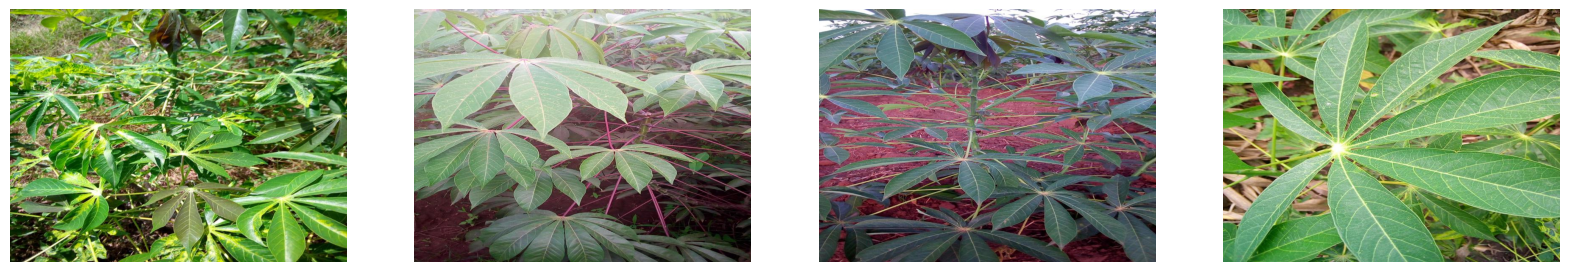

In [51]:
sample_images(train_dir, "cassava-healthy")

Green Motle

cassava-healthy


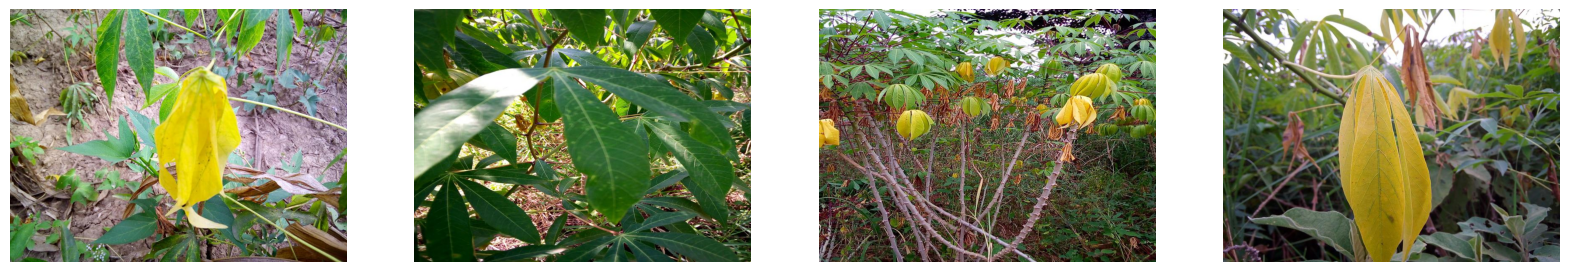

In [52]:
class_name = classes[3]
print(class_name)

sample_images(train_dir, class_name)

bacterial blight: